In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier



In [8]:
df = pd.read_csv("/content/sample_data/Water_Potability.csv")
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.80216,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.57822,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.86938,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [9]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [10]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [11]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [13]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

<Axes: >

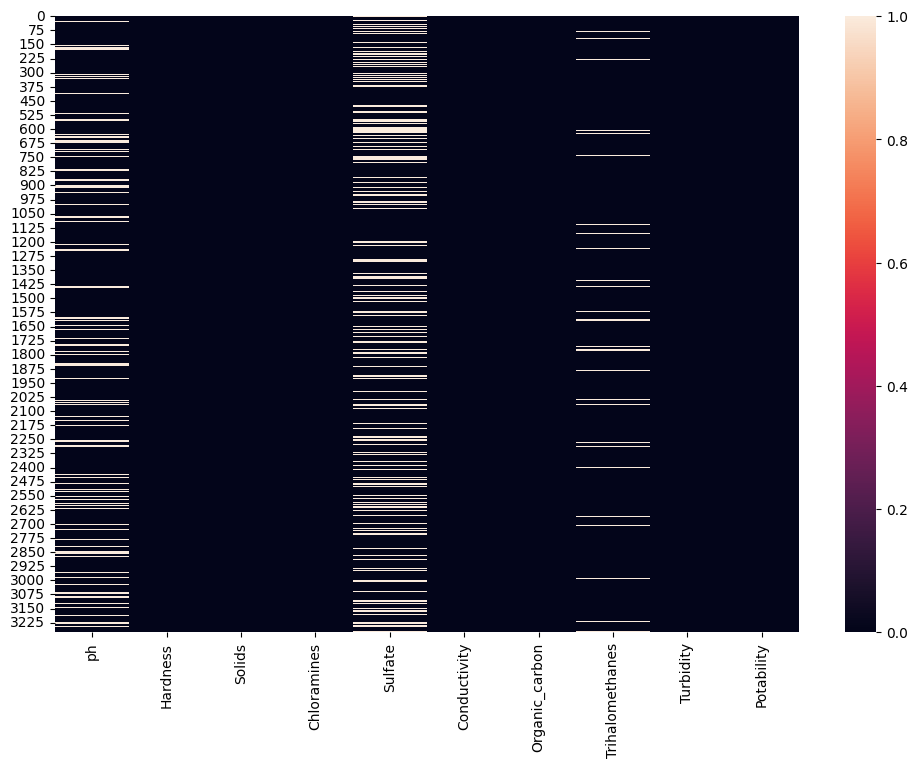

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull())

<Axes: >

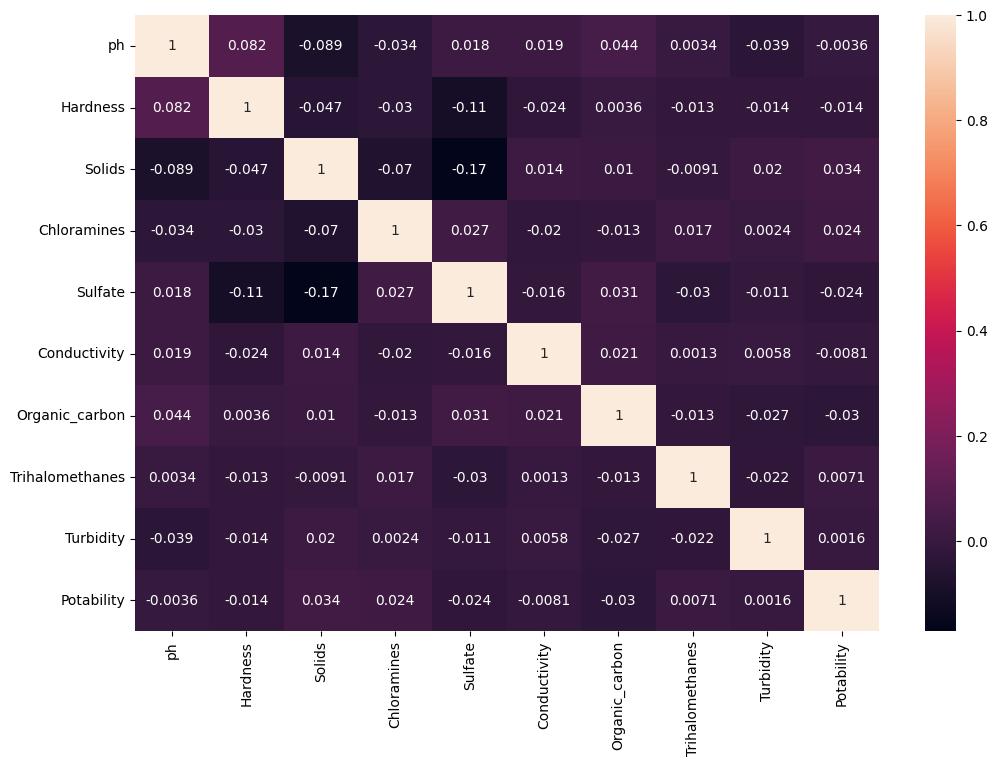

In [15]:
plt.figure(figsize= (12,8))
sns.heatmap(df.corr(), annot=True)

<Axes: xlabel='Potability', ylabel='count'>

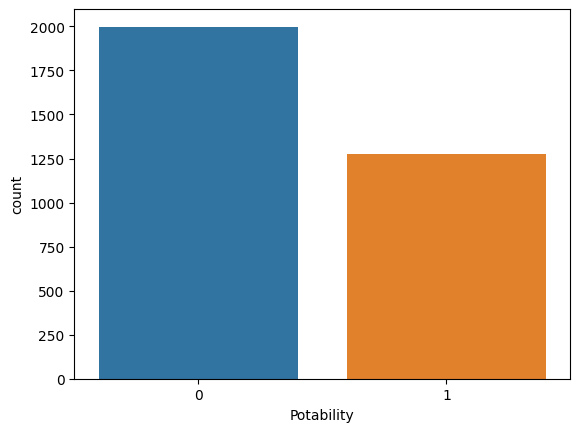

In [16]:
sns.countplot(x="Potability", data=df)

In [17]:
df["Potability"].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

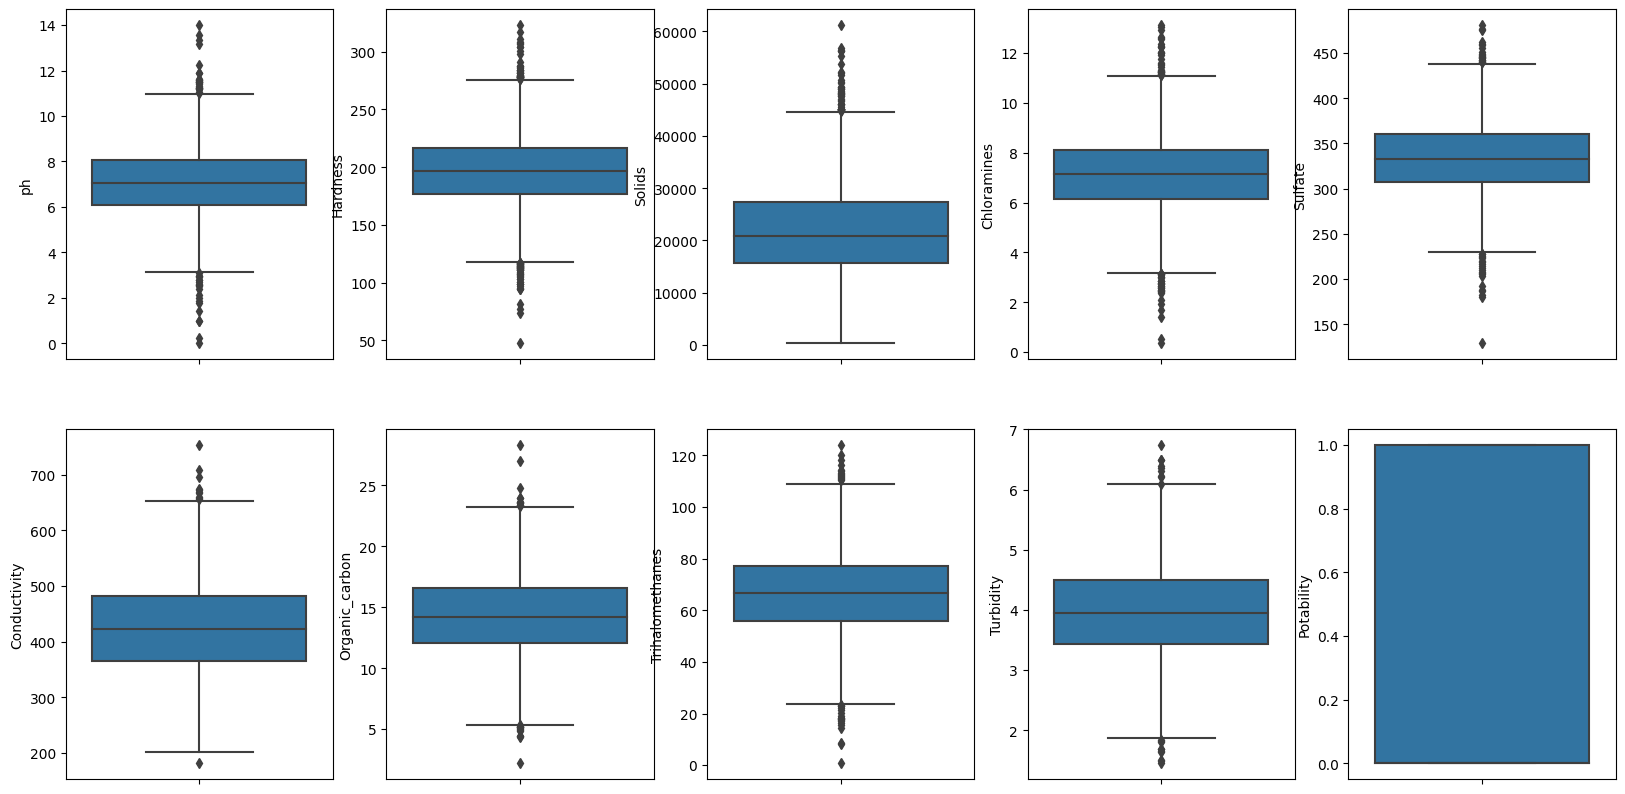

In [18]:
# Visualization dataset and also checking for outliers

fig, ax = plt.subplots(ncols=5, nrows=2, figsize= (20,10))

ax = ax.flatten()

index = 0

for col,values in df.items():
  sns.boxplot(y=col, data=df, ax = ax[index])

  index +=1

In [19]:
sns.pairplot(df);

Output hidden; open in https://colab.research.google.com to view.

In [20]:
fig = px.pie(df,names = "Potability", hole= 0.4,template ="plotly_dark" )
fig.show()

In [21]:
fig = px.scatter(df,x="ph", y="Sulfate",template="plotly_dark")
fig.show()

In [22]:
fig = px.scatter(df,x="ph", y="Sulfate",color = "Potability",template="plotly_dark")
fig.show()

In [23]:
fig = px.scatter(df,x="Organic_carbon", y="Hardness",color="Potability",template="plotly_dark")
fig.show()

Text(0, 0.5, 'Percentage of missing values')

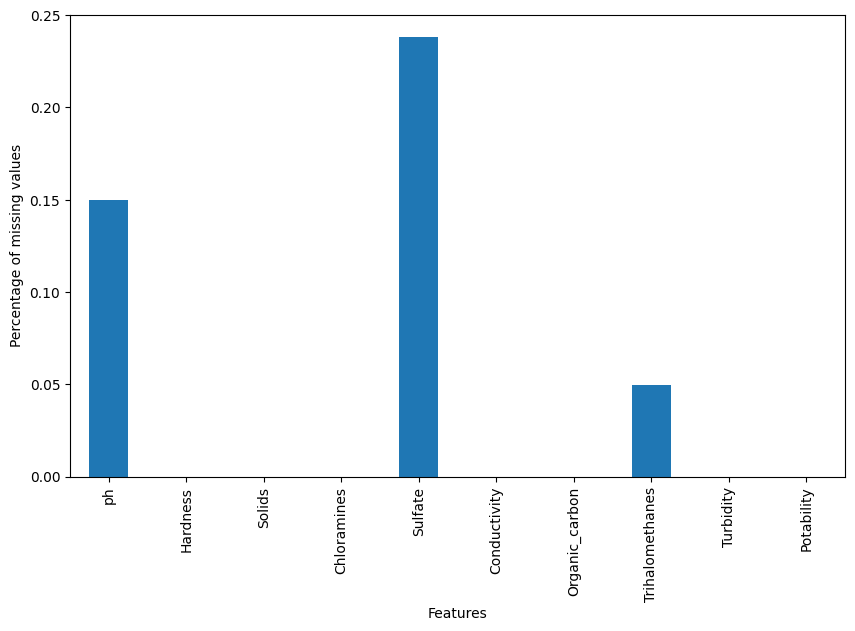

In [24]:
df.isnull().mean().plot.bar(figsize = (10,6));
plt.xlabel("Features")
plt.ylabel("Percentage of missing values")

In [25]:
# Filling null values
df["ph"] = df["ph"].fillna(df["ph"].mean())
df["Sulfate"] = df["Sulfate"].fillna(df["Sulfate"].mean())
df["Trihalomethanes"] = df["Trihalomethanes"].fillna(df["Trihalomethanes"].mean())


In [26]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

<Axes: >

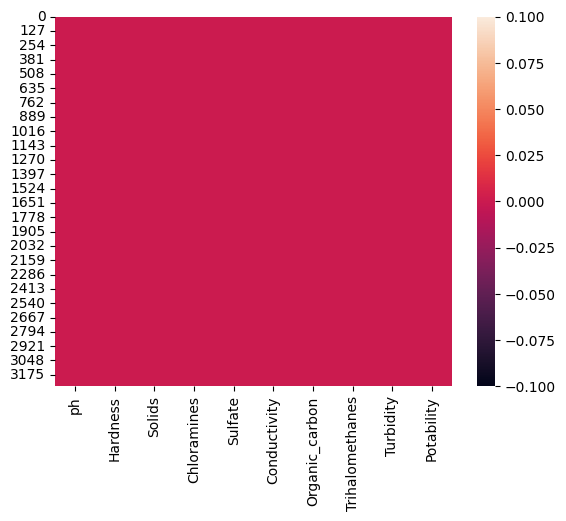

In [27]:
# Now we don't have the null values.
sns.heatmap(df.isnull())

In [28]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [29]:
# Data Preparations for Training, x-axis(features), y-axis(Target)
x = df.drop("Potability", axis=1)
y= df["Potability"]

In [30]:
x.shape, y.shape

((3276, 9), (3276,))

In [31]:
# Here keeping the data in one scale.(Standard Scaling)
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[ 0.00000000e+00,  2.59194712e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986649e-01, ...,
         2.70597241e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116858e-01,  1.50940874e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329233e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797384e-01],
       [ 5.40150905e-01, -3.85462306e-02, -5.25811938e-01, ...,
         5.60940071e-01,  7.80223466e-01, -2.12445866e+00]])

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [33]:
x_train.shape, x_test.shape

((2620, 9), (656, 9))

## Logistic Regression

In [34]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Object of LR
model_lr= LogisticRegression()

In [35]:
# Training Model
model_lr.fit(x_train,y_train)

LogisticRegression()

In [36]:
# Making Prediction
pred_lr = model_lr.predict(x_test)

In [37]:
# y_test is actual (we know the target) = 1,0
pred_lr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [38]:
# Accuracy score
accuracy_score_lr = accuracy_score(y_test, pred_lr)
accuracy_score_lr

0.5975609756097561

In [39]:
from sklearn.model_selection import cross_val_score
cross_val_score(model_lr, x,y,cv=5)

array([0.6097561 , 0.61068702, 0.61068702, 0.60916031, 0.61068702])

In [40]:
model_lr_cross_val_score = np.mean(cross_val_score(model_lr,x,y,cv=5))
model_lr_cross_val_score

0.6101954943213554

## Decision Tree Classifier

In [41]:
from sklearn.tree import DecisionTreeClassifier

# Creating the model object
model_dt = DecisionTreeClassifier(max_depth = 4)

In [42]:
# Training of Decision Tree
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [43]:
# Making Prediction using Decision Tree
pred_dt = model_dt.predict(x_test) # What the model is going to predict

In [44]:
accuracy_score_dt = accuracy_score(y_test, pred_dt)
accuracy_score_dt

0.6219512195121951

In [45]:
# Confusion matrix
cm2 = confusion_matrix(y_test, pred_dt)
cm2
# correct-365, incorrect-23

array([[347,  45],
       [203,  61]])

In [46]:
from sklearn.model_selection import cross_val_score
cross_val_score(model_dt, x,y,cv=5)

array([0.60213415, 0.64274809, 0.62290076, 0.58931298, 0.63969466])

In [47]:
model_dt_cross_val_score = np.mean(cross_val_score(model_dt,x,y,cv=5))
model_dt_cross_val_score

0.6193581269782164

## Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()


In [49]:
# Training model rf
model_rf.fit(x_train,y_train)

RandomForestClassifier()

In [50]:
# Making predictions
pred_rf = model_rf.predict(x_test)

In [51]:
accuracy_score_rf = accuracy_score(y_test, pred_rf)
accuracy_score_rf

0.6646341463414634

In [52]:
cross_val_score(model_rf, x,y,cv=5)

array([0.60823171, 0.63664122, 0.65038168, 0.60152672, 0.67938931])

In [53]:
model_rf_cross_val_score = np.mean(cross_val_score(model_rf,x,y,cv=5))
model_rf_cross_val_score

0.6254645317445541

In [54]:
cm3 = confusion_matrix(y_test, pred_rf)
cm3

array([[350,  42],
       [178,  86]])

## kNN

In [55]:
from sklearn.neighbors import KNeighborsClassifier

# Creating Model object
#model_knn = KNeighborsClassifier()

In [56]:
for i in range(4,15):
  model_knn = KNeighborsClassifier(n_neighbors=i)
  model_knn.fit(x_train,y_train)
  pred_knn = model_knn.predict(x_test)
  accuracy_score_knn = accuracy_score(y_test, pred_knn)
  print(i, accuracy_score_knn)
  # Best accuracy in 4- 0.649390243902439

4 0.6234756097560976
5 0.6158536585365854
6 0.6539634146341463
7 0.6234756097560976
8 0.635670731707317
9 0.6280487804878049
10 0.6280487804878049
11 0.6112804878048781
12 0.625
13 0.6310975609756098
14 0.6265243902439024


In [57]:
model_knn = KNeighborsClassifier(n_neighbors=4)
model_knn.fit(x_train,y_train)
pred_knn = model_knn.predict(x_test)
accuracy_score_knn = accuracy_score(y_test, pred_knn)
print(accuracy_score_knn)

0.6234756097560976


## SVM

In [58]:
from sklearn.svm import SVC

# Creating object of model
model_svm = SVC(kernel="rbf")

In [59]:
model_svm.fit(x_train, y_train)

SVC()

In [60]:
pred_svm = model_svm.predict(x_test)

In [61]:
accuracy_score_svm = accuracy_score(y_test, pred_svm)
accuracy_score_svm

0.6600609756097561

In [62]:
# For "Linear"
# model_svm = SVC(kernel="linear")
# model_svm.fit(x_train, y_train)
# pred_svm = model_svm.predict(x_test)
# accuracy_score_svm = accuracy_score(y_test, pred_svm)
# accuracy_score_svm

## AdaBoost Classifiers

In [63]:
from sklearn.ensemble import AdaBoostClassifier

model_ada = AdaBoostClassifier(n_estimators=200, learning_rate=0.03)

In [64]:
model_ada.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=0.03, n_estimators=200)

In [65]:
pred_ada = model_ada.predict(x_test)

In [66]:
accuracy_score_ada = accuracy_score(y_test, pred_ada)
accuracy_score_ada

0.614329268292683

## XGBoost

In [67]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier(n_estimators=200, learning_rate=0.03)

In [68]:
model_xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [69]:
pred_xgb = model_xgb.predict(x_test)

In [70]:
accuracy_score_xgb = accuracy_score(y_test, pred_xgb)
accuracy_score_xgb

0.6417682926829268

## Accuracy Scores

In [71]:
models = pd.DataFrame({
    "Model" : ["Logistic Regression",
               "Decision Tree",
               "Random Forest",
               "KNN",
               "SVM",
               "AdaBoost",
               "XGBoost"],

"Accuracy Score":[accuracy_score_lr,accuracy_score_dt, accuracy_score_rf,
                  accuracy_score_knn,accuracy_score_svm,accuracy_score_ada,
                  accuracy_score_xgb]
    })

In [72]:
models

,Model,Accuracy Score
0,Logistic Regression,0.597561
1,Decision Tree,0.621951
2,Random Forest,0.664634
3,KNN,0.623476
4,SVM,0.660061
5,AdaBoost,0.614329
6,XGBoost,0.641768


,Model,Accuracy Score
2,Random Forest,0.664634
4,SVM,0.660061
6,XGBoost,0.641768
3,KNN,0.623476
1,Decision Tree,0.621951
5,AdaBoost,0.614329
0,Logistic Regression,0.597561


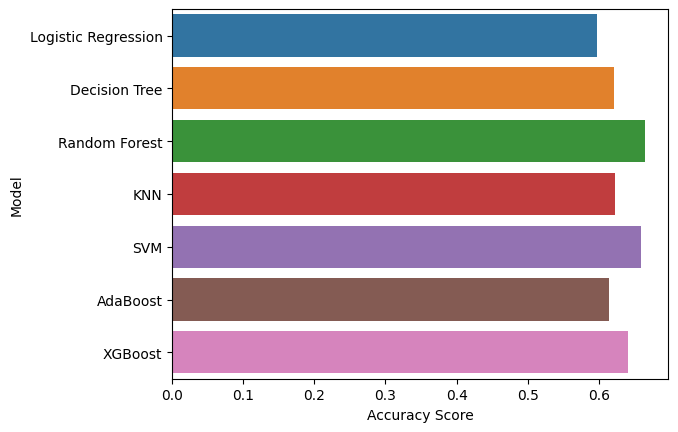

In [73]:
sns.barplot(x="Accuracy Score", y="Model", data= models)
models.sort_values(by="Accuracy Score", ascending= False)